In [3]:
import pyodbc 
import pandas as pd
import statistics 
import warnings
warnings.filterwarnings('ignore')

conn = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                      'Server=LAPTOP-34VQMBK6\SQLEXPRESS;'
                      'Database=Portofolio Data Analytics;'
                      'Trusted_Connection=yes;')

df = pd.read_sql_query('SELECT * FROM vCanada2', conn)

display(df)
print(type(df))
df['NumOfImm'] = df['NumOfImm'].astype('Int64')

,Coverage,OdName,AreaName,RegName,DevName,Year,NumOfImm
0,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,1980,16.0
1,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,1981,39.0
2,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,1982,39.0
3,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,1983,47.0
4,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions,1984,71.0
...,...,...,...,...,...,...,...
6591,Foreigners,Zimbabwe,Africa,Eastern Africa,Developing regions,2009,508.0
6592,Foreigners,Zimbabwe,Africa,Eastern Africa,Developing regions,2010,494.0
6593,Foreigners,Zimbabwe,Africa,Eastern Africa,Developing regions,2011,434.0
6594,Foreigners,Zimbabwe,Africa,Eastern Africa,Developing regions,2012,437.0


<class 'pandas.core.frame.DataFrame'>


In [4]:
df.describe()

,NumOfImm
count,6596.000000
mean,971.669648
std,3224.477320
min,0.000000
25%,7.000000
50%,102.000000
75%,588.000000
max,42584.000000


In [5]:
# Range
range_ni = max(df['NumOfImm'])-min(df['NumOfImm'])
print('Range =',range_ni)
print(50*'=')

# Variance
var_ni = statistics.variance(df['NumOfImm'])
print('Variance =',var_ni)
print(50*'=')

# Skewness
skew = df.skew(numeric_only=True)
print(skew)
print(50*'=')

# Kurtosis
kurt = df.kurtosis(numeric_only=True)
print(kurt)

Range = 42584
Variance = 10397253
NumOfImm    7.300867
dtype: float64
NumOfImm    63.784539
dtype: float64


In [6]:
import matplotlib.pyplot as plt

df = df.groupby('Year').agg({'NumOfImm': sum}).rename(columns={'NumOfImm': 'Number of Immigrants'}).reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

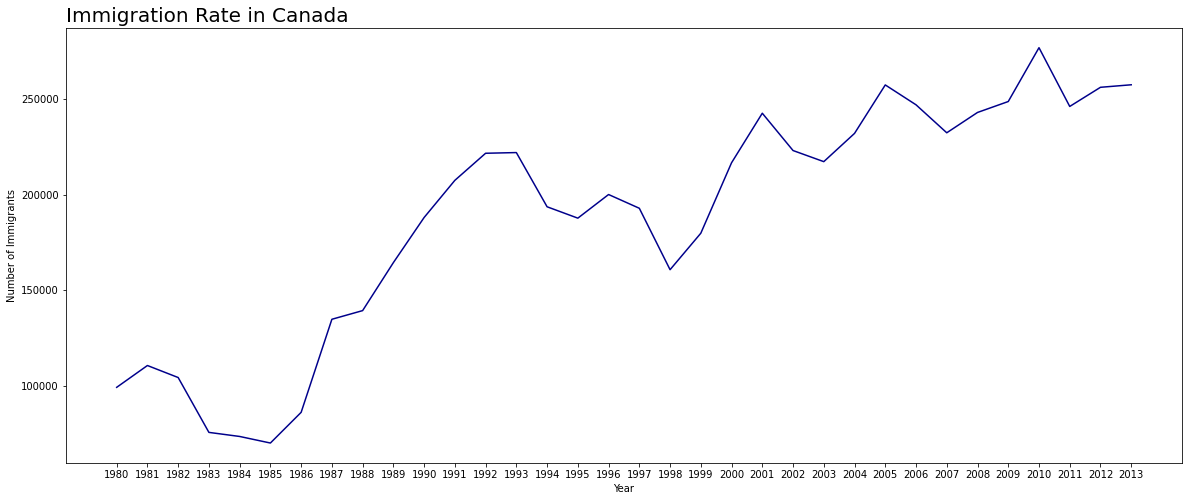

In [7]:
# Line plot

plt.figure(figsize=(20,8))
plt.plot(df['Year'],df['Number of Immigrants'], color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Immigration Rate in Canada', fontsize=20, loc='left')
plt.show

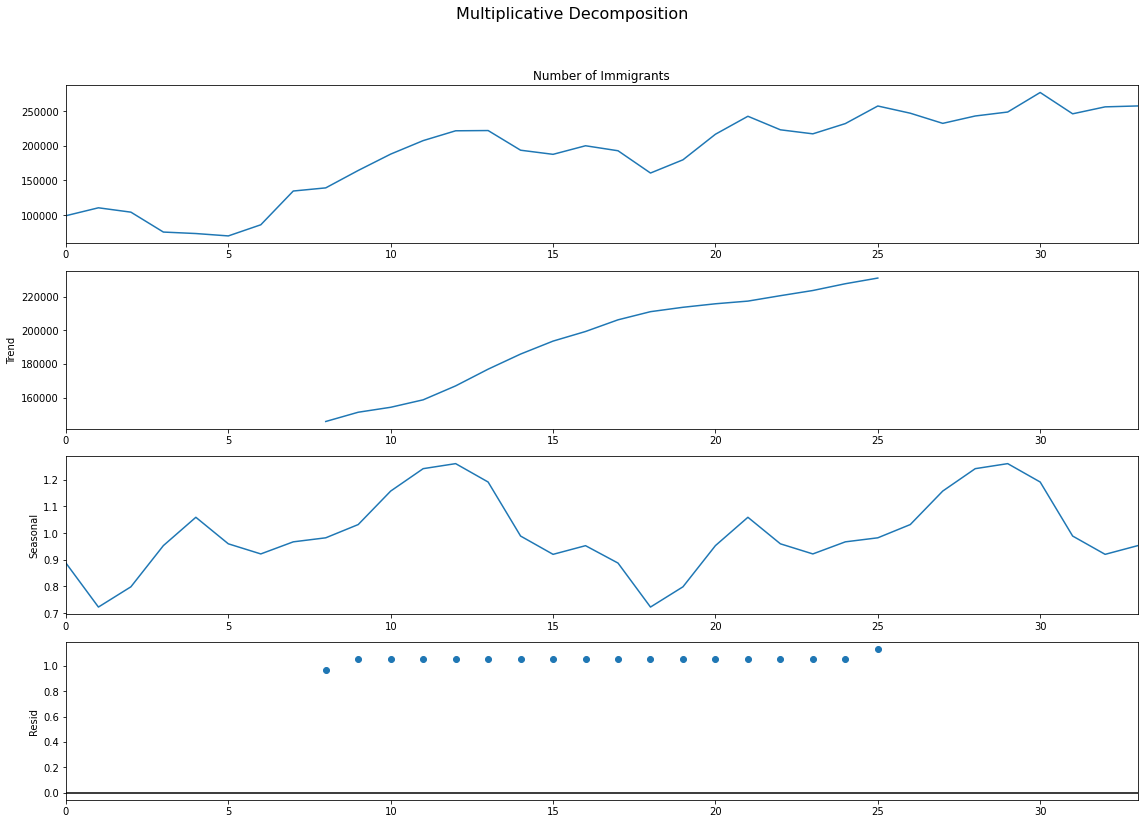

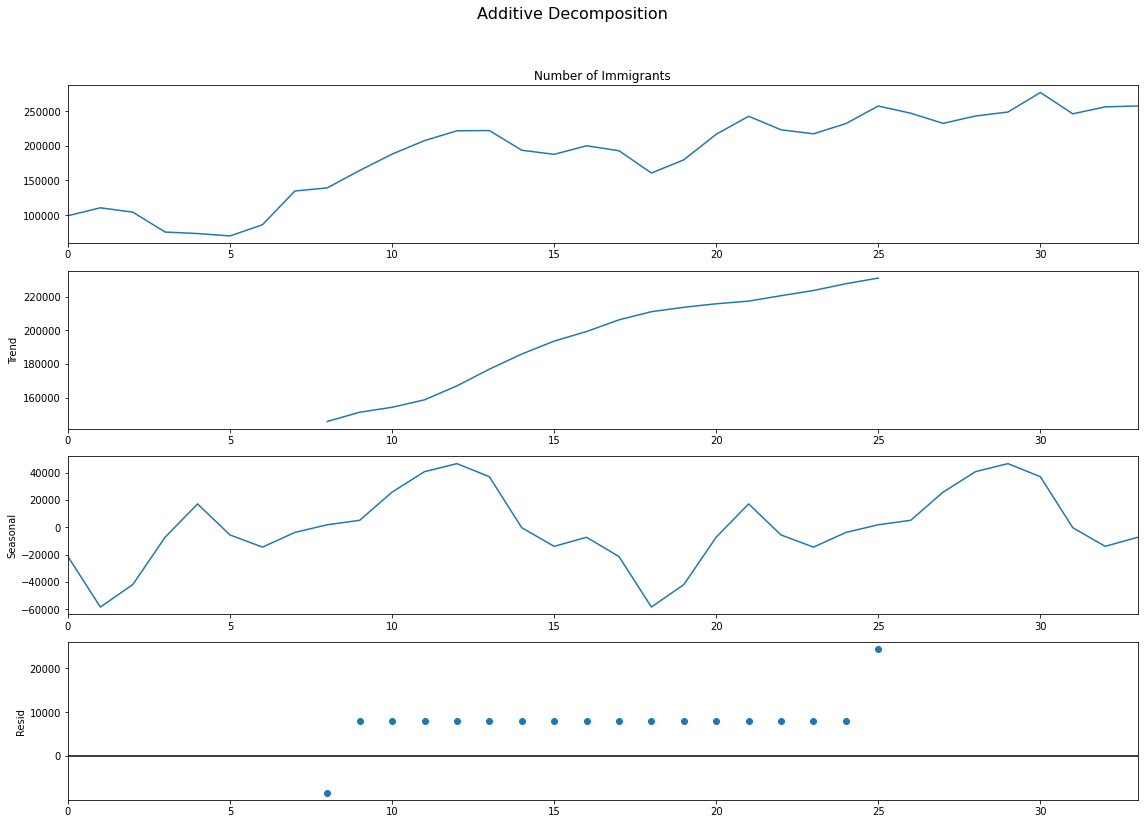

In [8]:
# Plot

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Immigrants'], model='multiplicative', period=17)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Immigrants'], model='additive', period=17)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

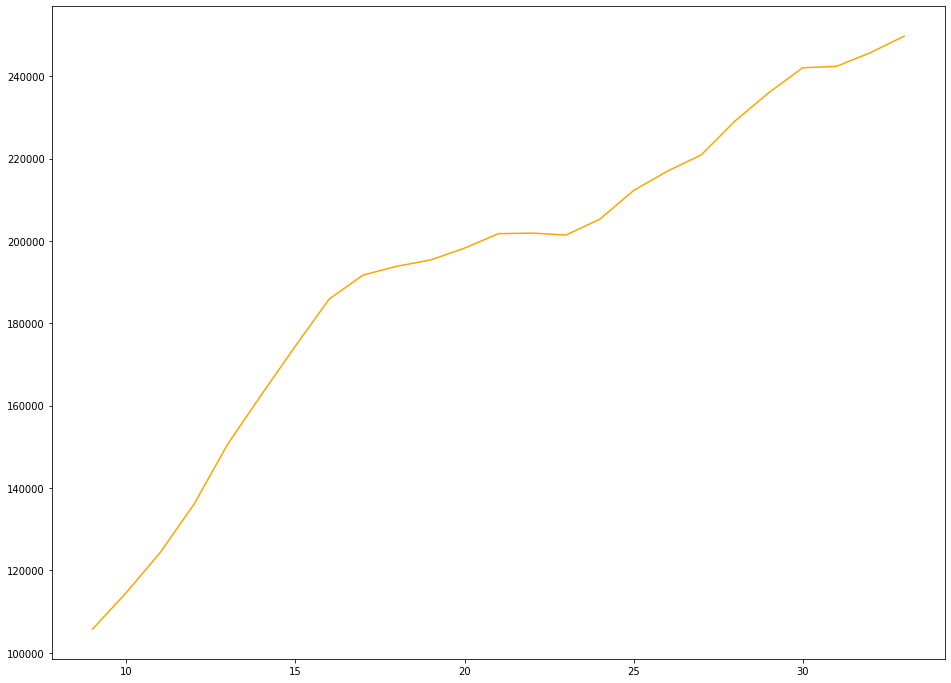

In [10]:
from pylab import rcParams
import pandas as pd

# Moving Average Method
rollingseries = df['Number of Immigrants'].rolling(window=10)
rollingmean= rollingseries.mean()
rollingmean.plot(color="orange")
plt.show()

In [18]:
import pyodbc 
import pandas as pd
import statistics 

conn = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                      'Server=LAPTOP-34VQMBK6\SQLEXPRESS;'
                      'Database=Portofolio Data Analytics;'
                      'Trusted_Connection=yes;')

df2 = pd.read_sql_query('SELECT * FROM vCanada3', conn, index_col='Year', parse_dates=True)
df2 = df2.sort_index()
df2

,Total
Year,
1980,99137.0
1981,110563.0
1982,104271.0
1983,75550.0
1984,73417.0
1985,69978.0
1986,86048.0
1987,134771.0
1988,139306.0


In [19]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

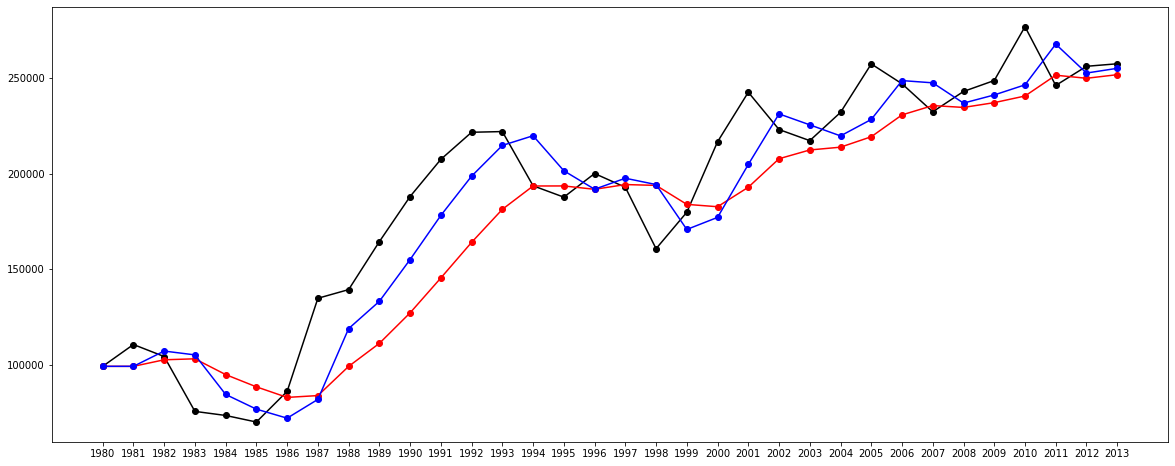

In [43]:
#Simple Exponential Smoothing

# import numpy as np

fit1 = SimpleExpSmoothing(df2).fit(smoothing_level=0.3, optimized=False)
fit2 = SimpleExpSmoothing(df2).fit(smoothing_level=0.7, optimized=False)
plt.figure(figsize=(20,8))
plt.plot(df2, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='red')
plt.plot(fit2.fittedvalues, marker='o', color='blue')

plt.show()

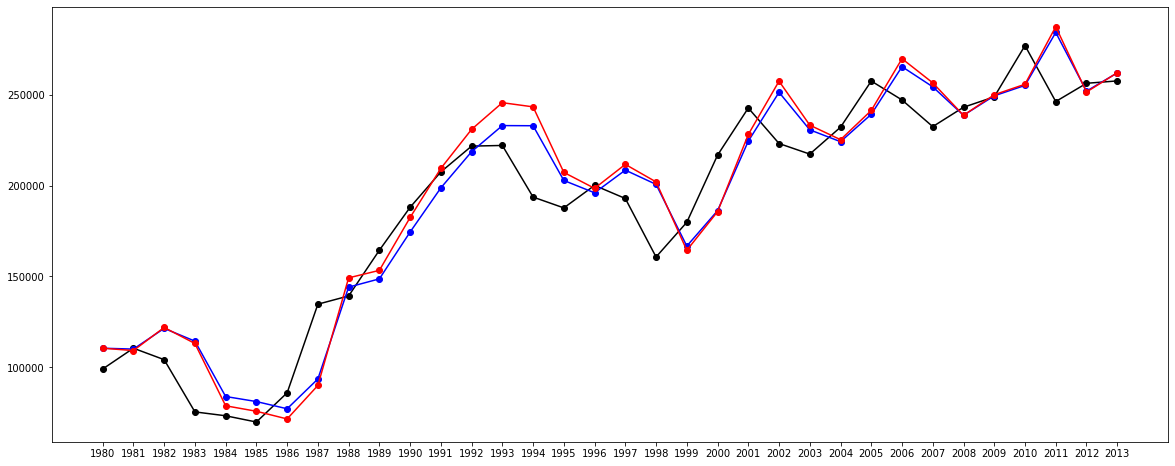

In [53]:
import warnings
warnings.filterwarnings('ignore')

fit1 = Holt(df2['Total']).fit()  
fit2 = Holt(df2, exponential=True).fit() 
plt.figure(figsize=(20,8))
plt.plot(df2, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='b')
plt.plot(fit2.fittedvalues, marker='o', color='r')
plt.show()

In [54]:
print (fit1.summary())

                              Holt Model Results                              
Dep. Variable:                  Total   No. Observations:                   34
Model:                           Holt   SSE                    13825929700.275
Optimized:                       True   AIC                            681.997
Trend:                       Additive   BIC                            688.103
Seasonal:                        None   AICC                           685.108
Seasonal Periods:                None   Date:                 Sat, 18 Jun 2022
Box-Cox:                        False   Time:                         07:40:11
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
smoothing_trend            0.0473810                

In [55]:
print (fit2.summary())

                              Holt Model Results                              
Dep. Variable:                  Total   No. Observations:                   34
Model:                           Holt   SSE                    16375538388.005
Optimized:                       True   AIC                            687.752
Trend:                 Multiplicative   BIC                            693.857
Seasonal:                        None   AICC                           690.863
Seasonal Periods:                None   Date:                 Sat, 18 Jun 2022
Box-Cox:                        False   Time:                         07:40:15
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
smoothing_trend            0.1184524                

In [35]:
predictions = fit2.forecast(steps=20)

<AxesSubplot:xlabel='Year'>

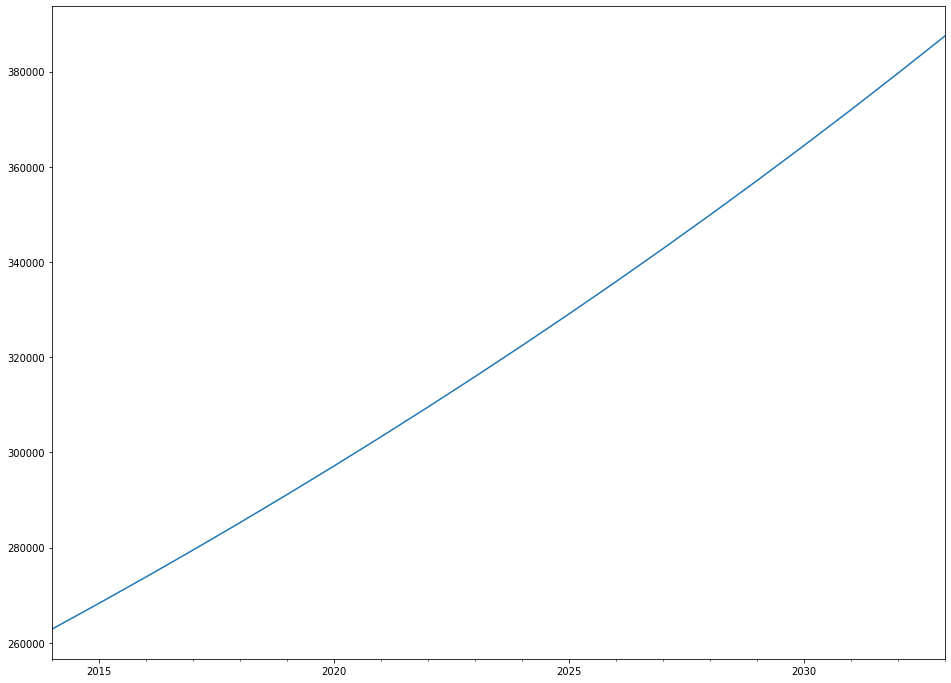

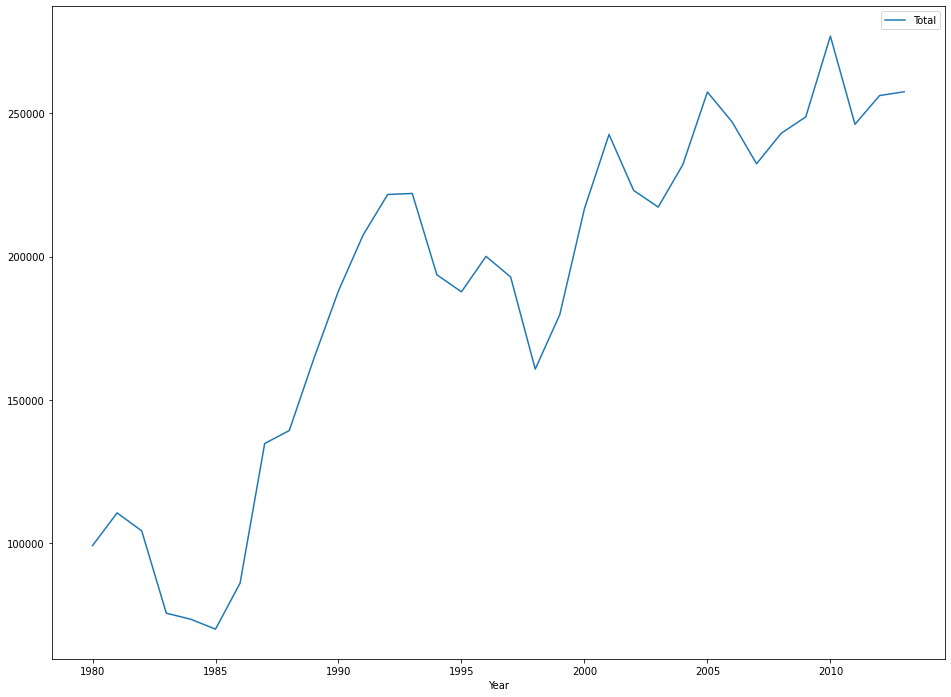

In [49]:
predictions.plot()
df2.plot()

In [30]:
from statsmodels.tsa.stattools import adfuller

# Stationary Analysis

adfuller_result = adfuller(df2.values, autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.9678766985054337
p-value: 0.30083317595906717
Critial Values:
   1%, -3.7238633119999998
Critial Values:
   5%, -2.98648896
Critial Values:
   10%, -2.6328004
